AIM: Predict Admission based on certain input parameters, while using Linear Regression

Project has been attempted with steps mentioned in below 2 links: 
    https://www.kaggle.com/yashrandive11/graduateadmissionprediction
    https://datatofish.com/logistic-regression-python/

Any suggestions/comments are welcome!

# LOADING DATA

In [ ]:
import pandas as pd
file_loc = r'C:\Users\AnupamDhingra\Documents\AnupamDhingra\COURSERA\Course_2_DesignThinking\14872_228180_bundle_archive\Admission_Predict_Ver1.1.xlsx'
dataset = pd.read_excel(file_loc)


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [3]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
# dropping the column'Serial No.' of dataset
dataset = dataset.drop(columns='Serial No.')

In [6]:
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
# shuffling the rows of dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,308,109,2,3.0,4.0,8.45,0,0.71
1,317,104,2,3.0,3.0,8.76,0,0.77
2,319,105,3,3.0,3.5,8.67,1,0.73
3,304,100,2,3.5,3.0,8.22,0,0.63
4,305,96,4,3.0,4.5,8.26,0,0.54


In [8]:
# stipping the columns of white spaces
dataset.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
dataset.columns = dataset.columns.str.strip()
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,308,109,2,3.0,4.0,8.45,0,0.71
1,317,104,2,3.0,3.0,8.76,0,0.77
2,319,105,3,3.0,3.5,8.67,1,0.73
3,304,100,2,3.5,3.0,8.22,0,0.63
4,305,96,4,3.0,4.5,8.26,0,0.54


In [10]:
dataset.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [11]:
df = dataset.copy()

# Checking for Linear Relationship of data

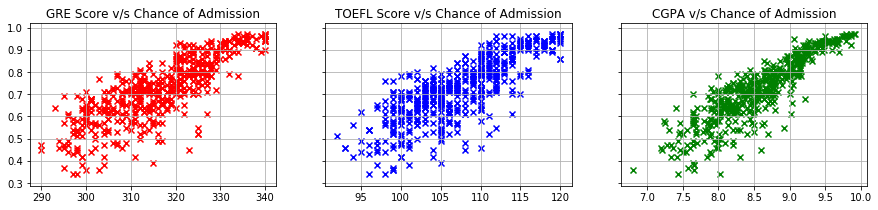

In [12]:
import seaborn as sn
import matplotlib.pyplot as plt

f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))

ax1.scatter(df['GRE Score'], df['Chance of Admit'], c='red', marker='x')
ax1.set_title('GRE Score v/s Chance of Admission')
# ax1.ylabel('Chance of Admission')
# ax1.xlabel('GRE Score')
ax1.grid(True)

ax2.scatter(df['TOEFL Score'], df['Chance of Admit'], c='blue', marker='x')
ax2.set_title('TOEFL Score v/s Chance of Admission')
# ax2.ylabel('Chance of Admission')
# ax2.xlabel('TOEFL Score')
ax2.grid(True)

ax3.scatter(df['CGPA'], df['Chance of Admit'], c='green', marker='x')
ax3.set_title('CGPA v/s Chance of Admission')
# ax3.ylabel('Chance of Admission')
# ax3.xlabel('CGPA')
ax3.grid(True)

plt.show()

In [13]:
# Dividing the dataset into train and test
# Keeping fist 400 records for training, rest for test

Y_train = df[['Chance of Admit']][:400]
Y_train.head()

,Chance of Admit
0,0.71
1,0.77
2,0.73
3,0.63
4,0.54


In [14]:
Y_train.min()

Chance of Admit    0.34
dtype: float64

In [15]:
Y_train.max()

Chance of Admit    0.97
dtype: float64

In [16]:
Y_train.describe()

,Chance of Admit
count,400.00000
mean,0.72080
std,0.14091
min,0.34000
25%,0.63000
50%,0.72500
75%,0.82000
max,0.97000


In [17]:
Y_test = df[['Chance of Admit']][400:]
Y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 400 to 499
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Chance of Admit  100 non-null    float64
dtypes: float64(1)
memory usage: 932.0 bytes


In [18]:
X_train = df.loc[:399,"GRE Score":"Research"]

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 22.0 KB


In [20]:
X_test = df.loc[400:,"GRE Score":"Research"]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 400 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          100 non-null    int64  
 1   TOEFL Score        100 non-null    int64  
 2   University Rating  100 non-null    int64  
 3   SOP                100 non-null    float64
 4   LOR                100 non-null    float64
 5   CGPA               100 non-null    float64
 6   Research           100 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 5.6 KB


ML Steps

In [21]:
from sklearn.model_selection import train_test_split 
# pythonic way of splitting training and test data:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# test_size=0.25 means training of data will be on 75% of the data 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [22]:
model = LinearRegression()
model.fit(X_train, Y_train.values.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
model.coef_

array([ 0.00173252,  0.00334681,  0.00970078, -0.00371858,  0.01509281,
        0.11648428,  0.02777325])

In [24]:
model.intercept_

-1.2707798589729422

In [25]:
Y_pred = model.predict(X_test)

In [26]:
Y_pred

array([0.89022882, 0.51813614, 0.5990422 , 0.74567823, 0.8445767 ,
       0.81435154, 0.73124292, 0.51318172, 0.58308226, 0.57478138,
       0.7395589 , 0.73197595, 0.85136276, 0.7101266 , 0.74912723,
       0.83146315, 0.64703058, 0.72787226, 0.82182992, 0.91668525,
       0.63328495, 0.6519988 , 0.78503204, 0.73244129, 0.87862021,
       0.81694892, 0.58970711, 0.49521949, 0.52645967, 0.57017547,
       0.65138227, 0.7792586 , 0.60892199, 0.55658628, 0.96539104,
       0.58429626, 0.66760783, 0.70032156, 0.9082864 , 0.78635555,
       0.97821522, 0.70945748, 0.65889313, 0.64537207, 0.64383257,
       0.66824389, 0.78794619, 0.74831221, 0.55900726, 0.69830535,
       0.50447067, 0.96165181, 0.71937267, 0.74104161, 0.85537229,
       0.6186905 , 0.65725523, 0.75459178, 0.66966079, 0.5371748 ,
       0.69607292, 0.46073576, 0.66582921, 0.79100577, 0.94572206,
       0.95622461, 0.80376671, 0.62507178, 0.67108402, 0.58850208,
       0.80371881, 0.8913329 , 0.64902499, 0.71634601, 0.95242

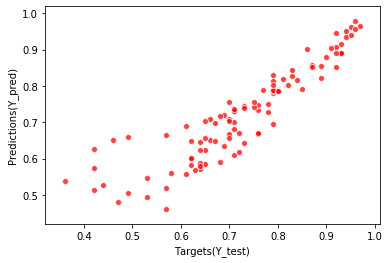

In [27]:
plt.scatter(Y_test, Y_pred, alpha=0.75, edgecolor='white', c='red')
plt.xlabel('Targets(Y_test)', size=10)
plt.ylabel('Predictions(Y_pred)', size=10)
# plt.grid(True)
plt.show()

In [28]:
# getting R-squared value
model.score(X_train, Y_train)


0.8199063095398517

In [29]:
model.score(X_test, Y_test)

0.8244202843790677